**Analyses of preprocessed tables**

In [1]:
import sys  
import seaborn as sns  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.colors as mcolors  
import ast  
import json  
sys.path.append('src')

from preprocessing import *   

# Load the data, path to modify (les deux CSV issus du preprocessing)
movies = pd.read_csv('/Users/svenhominal/Desktop/ADA/ADA10112024/data/processed/merged_movies.csv', sep=',')   
summaries_preprocessed = pd.read_csv('/Users/svenhominal/Desktop/ADA/ADA10112024/data/processed/summaries_preprocessed.csv', sep = ',') 

In [2]:
movies.head()

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv..."
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938.0,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']"
2,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ..."
3,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C..."
4,612710,/m/02wjqm,New Rose Hotel,1999.0,21521.0,92.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Future noir',..."


In [3]:
summaries_preprocessed.head()

,wikipedia_movie_id,plot_summary,clean_plot_summary,tokenized_plot_summary,filtered_tokens,lemmatized_tokens
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",shlykov a hardworking taxi driver and lyosha a...,"['shlykov', 'a', 'hardworking', 'taxi', 'drive...","['shlykov', 'hardworking', 'taxi', 'driver', '...","['shlykov', 'hardworking', 'taxi', 'driver', '..."
1,31186339,The nation of Panem consists of a wealthy Capi...,the nation of panem consists of a wealthy capi...,"['the', 'nation', 'of', 'panem', 'consists', '...","['nation', 'panem', 'consists', 'wealthy', 'ca...","['nation', 'panem', 'consists', 'wealthy', 'ca..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,poovalli induchoodan is sentenced for six year...,"['poovalli', 'induchoodan', 'is', 'sentenced',...","['poovalli', 'induchoodan', 'sentenced', 'six'...","['poovalli', 'induchoodan', 'sentenced', 'six'..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",the lemon drop kid a new york city swindler is...,"['the', 'lemon', 'drop', 'kid', 'a', 'new', 'y...","['lemon', 'drop', 'kid', 'new', 'york', 'city'...","['lemon', 'drop', 'kid', 'new', 'york', 'city'..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,seventhday adventist church pastor michael cha...,"['seventhday', 'adventist', 'church', 'pastor'...","['seventhday', 'adventist', 'church', 'pastor'...","['seventhday', 'adventist', 'church', 'pastor'..."


**Check for duplicates and remove them**

In [4]:
# We check for duplicates
print("Number of duplicated according to Wikipedia ID: ", movies['wikipedia_movie_id'].duplicated().sum())
print("Number of duplicated according to Freebase movie ID: ", movies['freebase_movie_id'].duplicated().sum())
print("Number of duplicated according to title of the movie: ", movies['movie_name'].duplicated().sum())

# We investigate further to see why some movies have the same name
print("Total number of rows before removing duplicates: ", len(movies))

# Investigate duplicates by movie name
duplicates = movies[movies['movie_name'].duplicated(keep=False)]
print("Number of rows with duplicated movie names: ", len(duplicates))
#print(duplicates.head())

# Remove duplicates while keeping the first occurrence
movies = movies.drop_duplicates(subset=['movie_name'], keep='first')

print("Total number of rows after removing duplicates: ", len(movies))

Number of duplicated according to Wikipedia ID:  65
Number of duplicated according to Freebase movie ID:  65
Number of duplicated according to title of the movie:  295
Total number of rows before removing duplicates:  8954
Number of rows with duplicated movie names:  545
Total number of rows after removing duplicates:  8659


In [5]:
print((movies.isna().sum() / movies.shape[0]) * 100)


wikipedia_movie_id          0.000000
freebase_movie_id           0.000000
movie_name                  0.000000
movie_release_date          0.831505
movie_box_office_revenue    0.000000
movie_runtime               0.000000
movie_languages             0.000000
movie_countries             0.000000
movie_genres                0.000000
dtype: float64


In [6]:
movies['movie_runtime'].describe()

count    8659.000000
mean      105.320326
std        23.321591
min        10.000000
25%        93.000000
50%       101.000000
75%       114.000000
max      1003.000000
Name: movie_runtime, dtype: float64

In [7]:
# Filter out rows with empty genres or languages
movies = movies[(movies['movie_genres'].map(len) > 0) & (movies['movie_languages'].map(len) > 0) & (movies['movie_countries'].map(len) > 0)]

# Group the years into 5-year intervals
movies['year_interval'] = (movies['movie_release_date'] // 5) * 5

In [8]:
movies.head()

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year_interval
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",2000.0
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938.0,3600000.0,106.0,['English Language'],['United States of America'],"['Musical', 'Comedy', 'Black-and-white']",1935.0
2,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,['English Language'],['United Kingdom'],"['Costume drama', 'War film', 'Epic', 'Period ...",1985.0
3,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,['English Language'],['United States of America'],"[""Children's/Family"", 'Musical', 'Fantasy', 'C...",1960.0
4,612710,/m/02wjqm,New Rose Hotel,1999.0,21521.0,92.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Future noir',...",1995.0


/var/folders/vn/57rl296d3kj3d3mdgckts32m0000gn/T/ipykernel_97062/1996315395.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


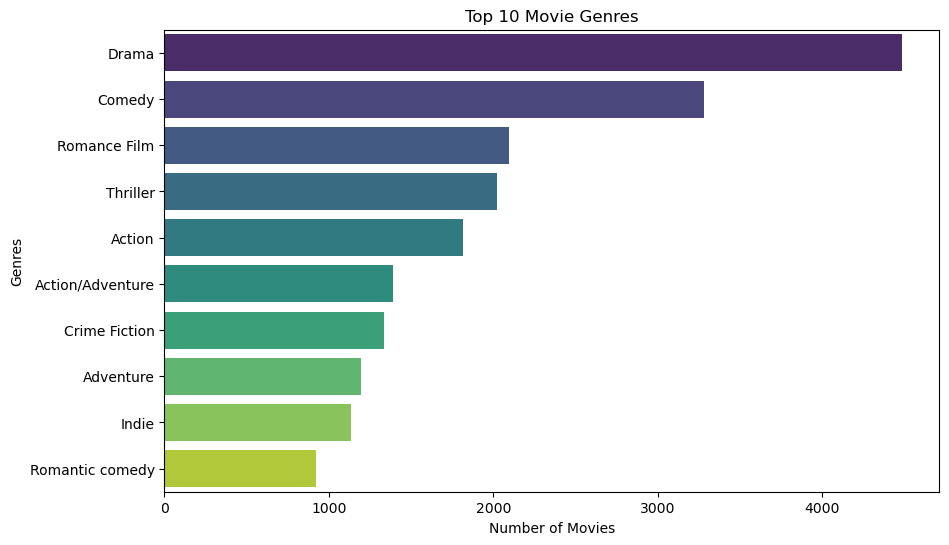

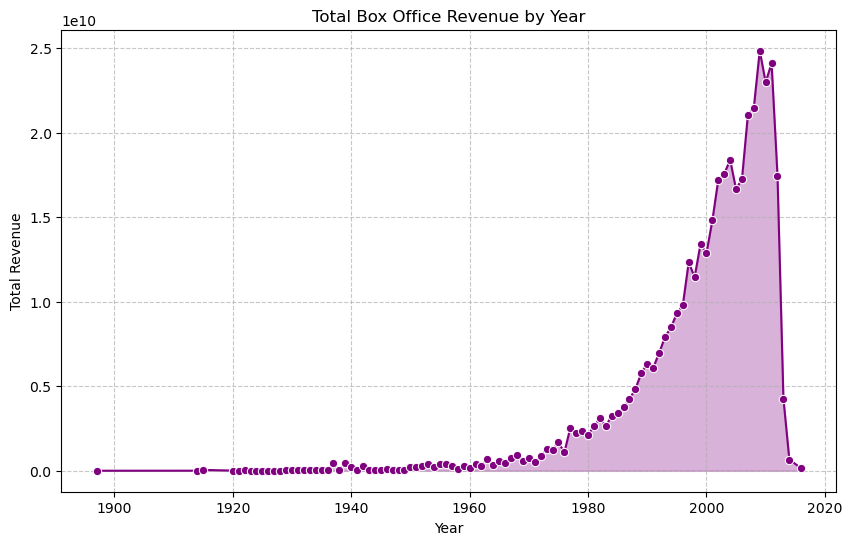

In [9]:
# Top 10 Movie Genres  
movies['movie_genres'] = movies['movie_genres'].apply(ast.literal_eval)

movies_genres_exploded = movies.explode('movie_genres')
top_genres = movies_genres_exploded['movie_genres'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.grid(False)
plt.show()

# Total Box Office Revenue by Year
revenue_by_year = movies.groupby('movie_release_date')['movie_box_office_revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_year, x='movie_release_date', y='movie_box_office_revenue', marker='o', color='purple')
plt.fill_between(revenue_by_year['movie_release_date'], revenue_by_year['movie_box_office_revenue'], color='purple', alpha=0.3)
plt.title('Total Box Office Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/var/folders/vn/57rl296d3kj3d3mdgckts32m0000gn/T/ipykernel_97062/1577935737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


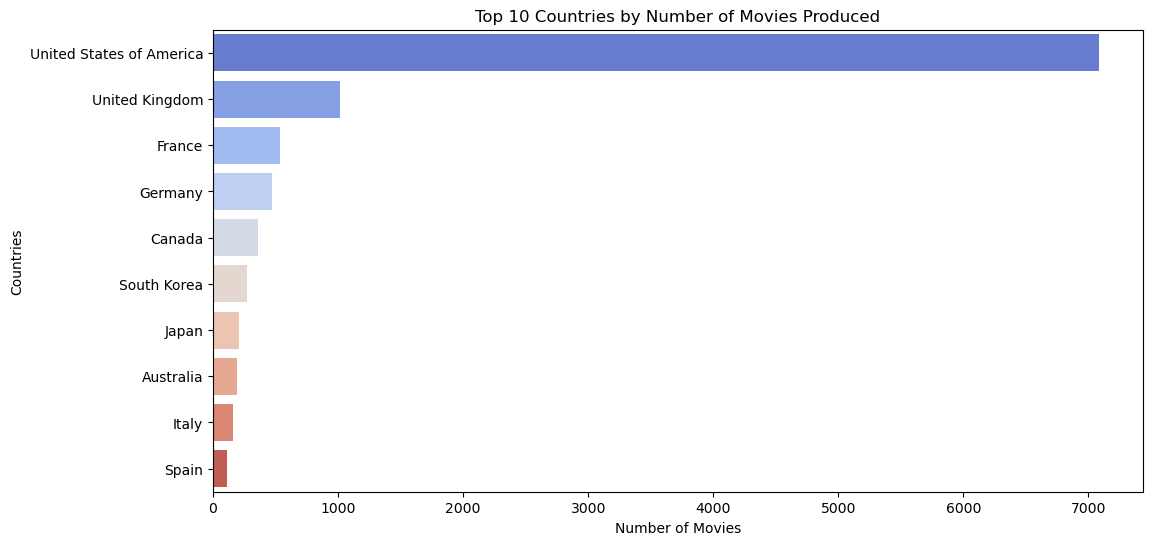

In [10]:
# Ensure that the movie_countries column is parsed as lists
movies['movie_countries'] = movies['movie_countries'].apply(ast.literal_eval)

# Filter out rows with empty countries
movies = movies[movies['movie_countries'].map(len) > 0]

# Top 10 Countries by Number of Movies Produced
movies_countries_exploded = movies.explode('movie_countries')
top_countries = movies_countries_exploded['movie_countries'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Movies Produced')
plt.xlabel('Number of Movies')
plt.ylabel('Countries')  
plt.grid(False)
plt.show()

<Figure size 1500x1000 with 0 Axes>

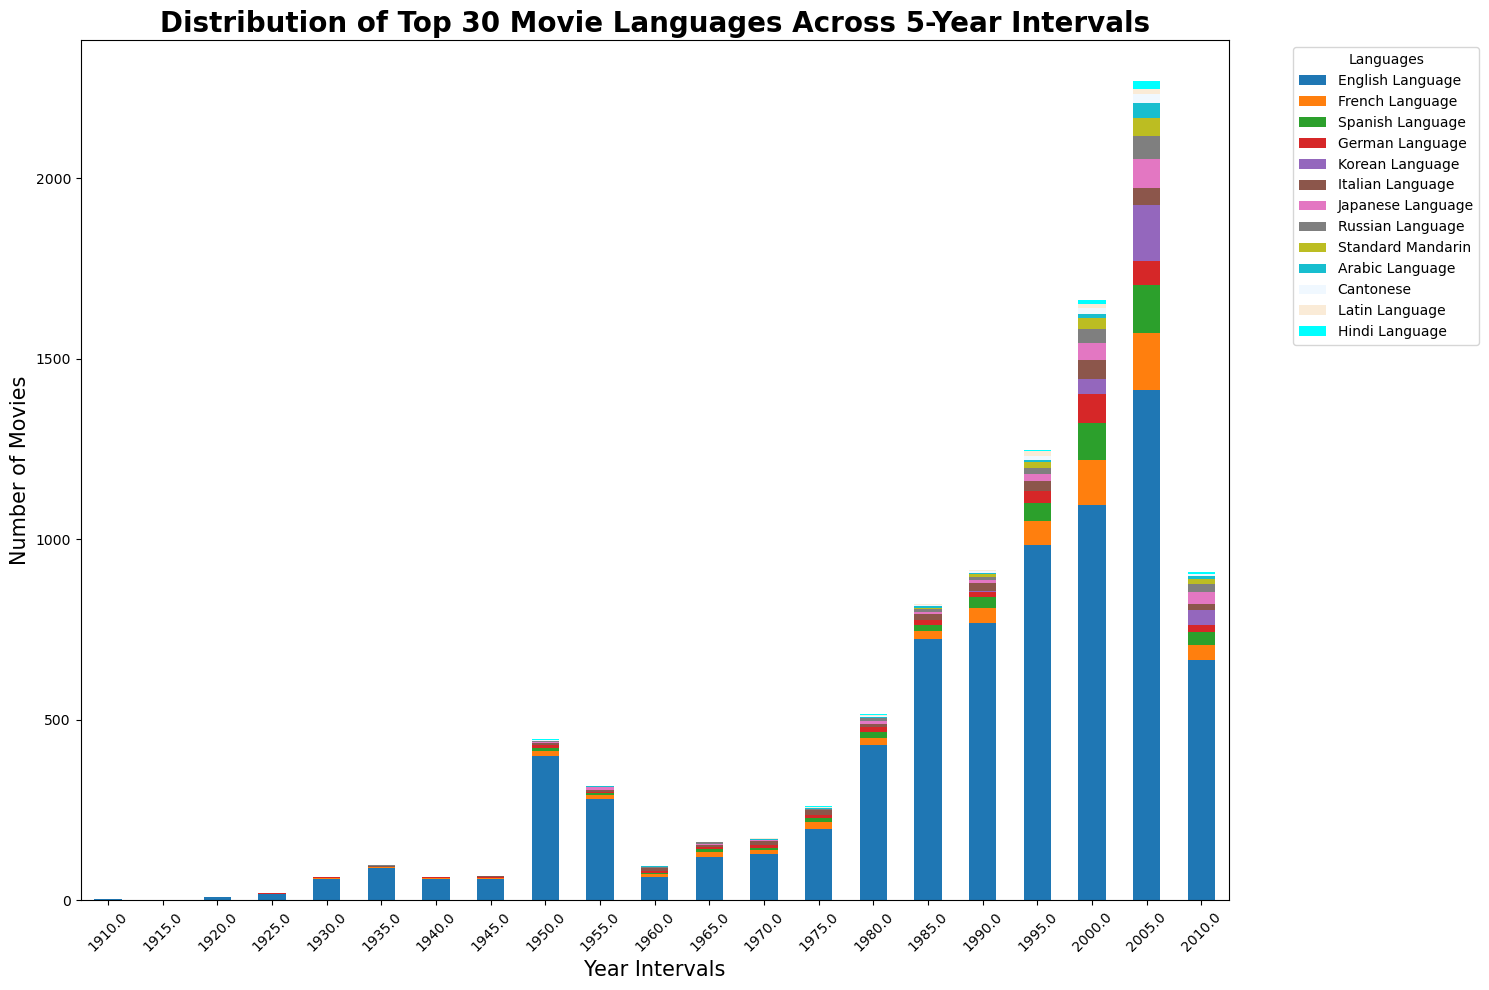

In [11]:
# Explode the extracted_genres and extracted_languages lists to separate rows
movies['movie_languages'] = movies['movie_languages'].apply(ast.literal_eval)


movies_languages_exploded = movies.explode('movie_languages')

# Create pivot tables with the count of each genre and language per 5-year interval
language_year_pivot = movies_languages_exploded.pivot_table(index='year_interval', columns='movie_languages', aggfunc='size', fill_value=0)

language_counts = movies_languages_exploded['movie_languages'].value_counts()
valid_languages = language_counts[language_counts >= 50].index
language_year_pivot = language_year_pivot[valid_languages]  

# Define a custom colormap with 30 distinct colors
colors = list(mcolors.TABLEAU_COLORS.values()) + list(mcolors.CSS4_COLORS.values())
custom_colormap = colors[:30]

# Plot the stacked bar plot for languages
plt.figure(figsize=(15, 10))
language_year_pivot.plot(kind='bar', stacked=True, color=custom_colormap, figsize=(15, 10))

# Add titles and labels
plt.title('Distribution of Top 30 Movie Languages Across 5-Year Intervals', fontsize=20, fontweight='bold')
plt.xlabel('Year Intervals', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.legend(title='Languages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

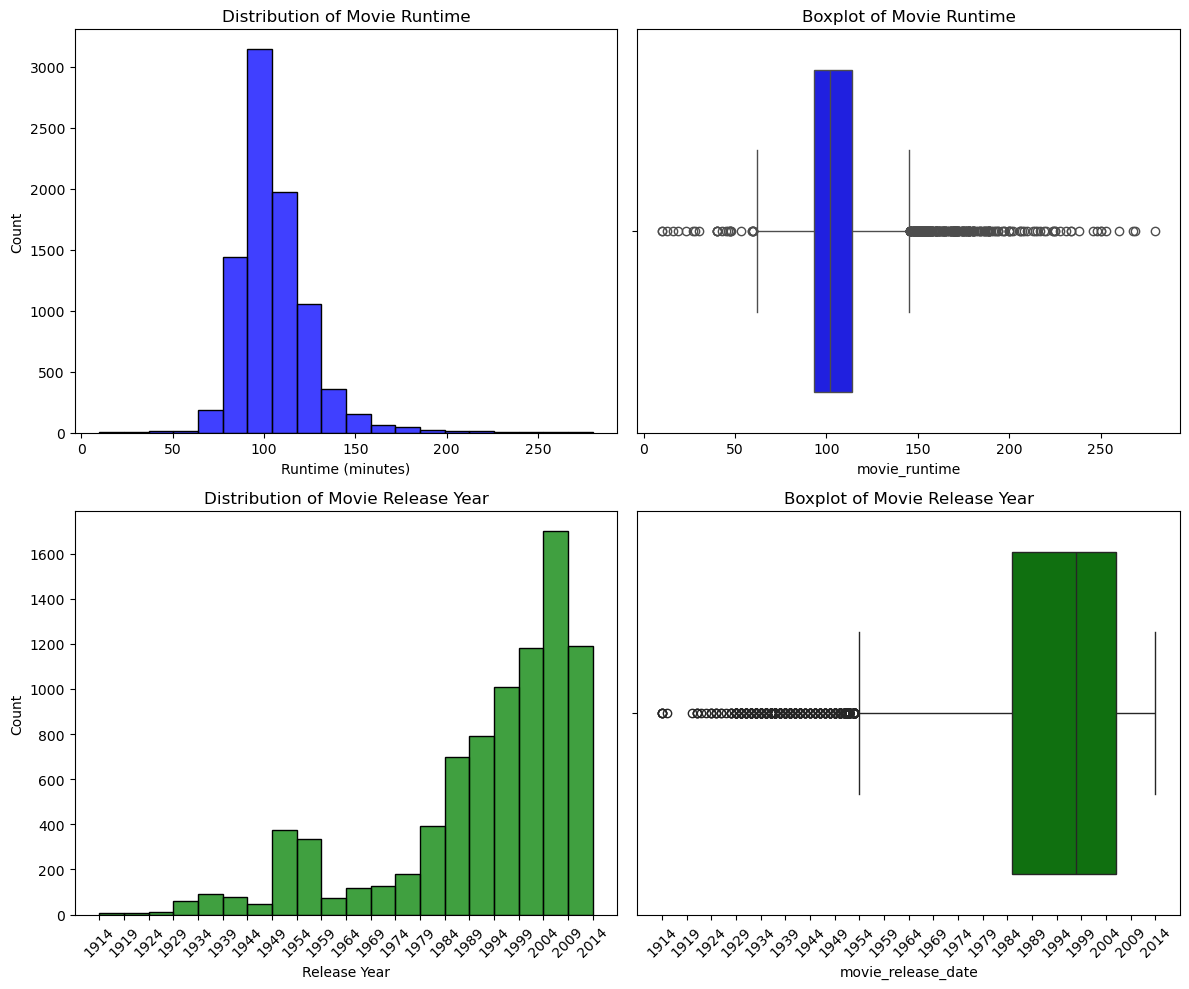

In [12]:
# Create a figure with subplots (2x2 layout)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distribution of movie runtime (no KDE and fewer bins)
sns.histplot(movies[movies['movie_runtime'] < 300]['movie_runtime'].dropna(), kde=False, bins=20, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Movie Runtime')
axes[0, 0].set_xlabel('Runtime (minutes)')  
axes[0, 0].grid(False)


# Boxplot for movie runtime
sns.boxplot(x=movies[movies['movie_runtime'] < 300]['movie_runtime'].dropna(), ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Boxplot of Movie Runtime')  
axes[0, 1].grid(False)


# Plot distribution of release year (no KDE and fewer bins)
sns.histplot(movies['movie_release_date'].dropna(), kde=False, bins=20, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Movie Release Year')
axes[1, 0].set_xlabel('Release Year')
axes[1, 0].set_xticks(np.arange(movies['movie_release_date'].min(), movies['movie_release_date'].max()+1, 5))
axes[1, 0].tick_params(axis='x', rotation=45)   
axes[1, 0].grid(False)


# Boxplot for movie release year
sns.boxplot(x=movies['movie_release_date'].dropna(), ax=axes[1, 1], color='green')
axes[1, 1].set_title('Boxplot of Movie Release Year')
axes[1, 1].set_xticks(np.arange(movies['movie_release_date'].min(), movies['movie_release_date'].max()+1, 5))
axes[1, 1].tick_params(axis='x', rotation=45)  
axes[1, 1].grid(False)


# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()

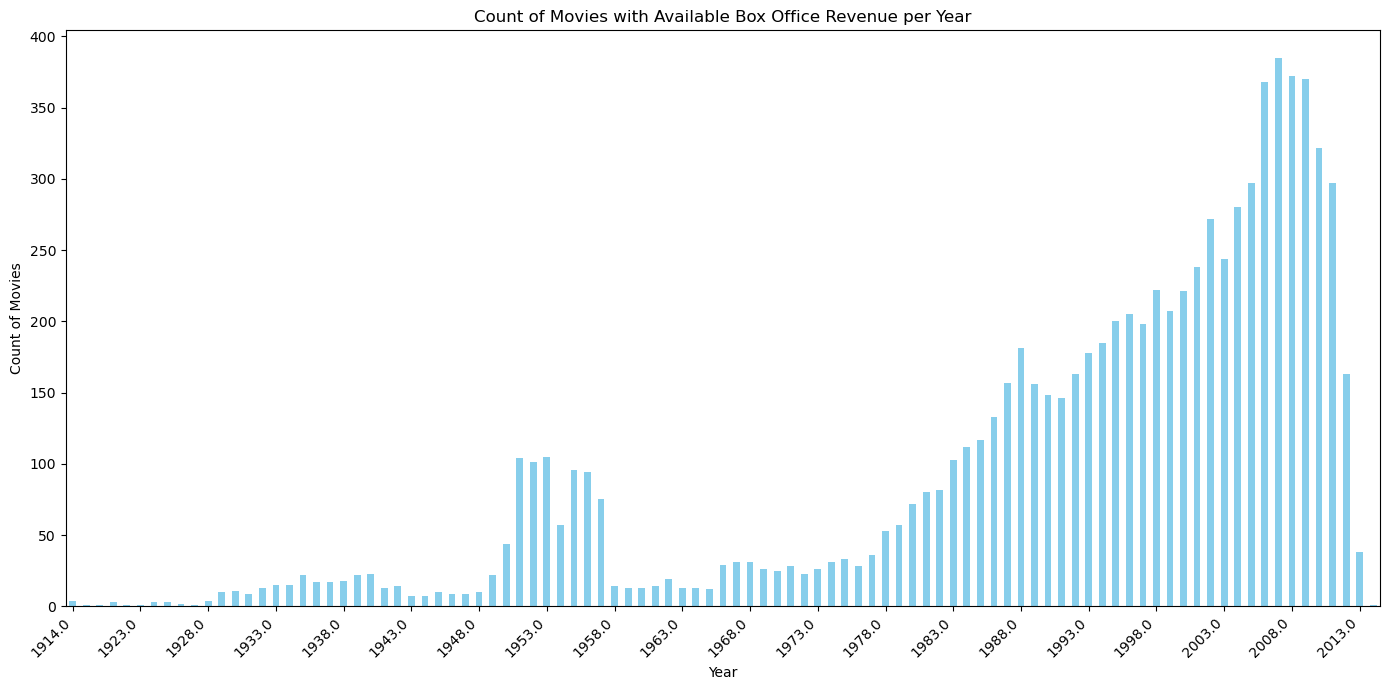

In [13]:
# Group by release year and count the movies with available revenue
revenue_counts_by_year = movies.groupby('movie_release_date').size()

# Plot the counts of movies with available box office revenue by year
plt.figure(figsize=(14, 7))
revenue_counts_by_year.plot(kind='bar', color='skyblue')

# Update x-axis for readability
plt.title('Count of Movies with Available Box Office Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate labels at a 45-degree angle for readability

# Optionally display fewer labels, e.g., every 5 years
plt.xticks(ticks=range(0, len(revenue_counts_by_year), 5), 
           labels=revenue_counts_by_year.index[::5])
plt.grid(False)
plt.tight_layout()
plt.show()

In [14]:
movies.head()

,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year_interval
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2000.0
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938.0,3600000.0,106.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",1935.0
2,171005,/m/016ywb,Henry V,1989.0,10161099.0,137.0,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",1985.0
3,77856,/m/0kcn7,Mary Poppins,1964.0,102272727.0,139.0,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",1960.0
4,612710,/m/02wjqm,New Rose Hotel,1999.0,21521.0,92.0,[English Language],[United States of America],"[Thriller, Science Fiction, Future noir, Indie...",1995.0
